In [1]:
from PIL import Image

In [2]:
import numpy as np

In [3]:
import glob

In [4]:
# I get data_list with
fire_data_list = glob.glob('../datasets/fire/fire/*.jpg')

In [5]:
data = [np.array(Image.open(v)) for v in fire_data_list]

In [6]:
ave_width=sum([Image.open(v).width for v in fire_data_list])/len(fire_data_list)

In [7]:
ave_width

494.3685220729367

In [8]:
ave_height=sum([Image.open(v).height for v in fire_data_list])/len(fire_data_list)

In [9]:
ave_height

425.531669865643

In [10]:
fire_data=[np.array(Image.open(v).resize((495,426))) for v in fire_data_list]

In [11]:
fire_data[0].shape

(426, 495, 3)

In [12]:
traffic_data_list = glob.glob('../datasets/traffic_incident/traffic_incident/*.jpg')

In [13]:
ave_width=sum([Image.open(v).width for v in traffic_data_list])/len(traffic_data_list)

In [14]:
ave_width

455.0247422680412

In [15]:
ave_height=sum([Image.open(v).height for v in traffic_data_list])/len(traffic_data_list)

In [16]:
ave_height

423.75876288659794

In [17]:
traffic_data=[np.array(Image.open(v).resize((495,426))) for v in traffic_data_list]

In [18]:
fire_labels=[0]*len(fire_data_list)

In [19]:
traffic_labels=[1]*len(traffic_data_list)

In [20]:
total_data=fire_data+traffic_data

In [21]:
total_labels=fire_labels+traffic_labels

In [22]:
total_labels=np.array(total_labels)

In [23]:
total_data=np.array(total_data)

In [24]:
len(total_data)==len(total_labels)

True

In [30]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np

In [36]:
from tensorflow.keras import layers

In [32]:
from keras.models import Sequential

In [37]:
'''
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(495, 426,3)),
    tf.keras.layers.Dense(2100, activation='relu'),
    tf.keras.layers.Dense(2)
])
'''
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(495, 426, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.fit(total_data, total_labels, epochs=5,validation_split=0.1)

Epoch 1/5
29/29 [==============================] - 83s 3s/step - loss: 0.2471 - accuracy: 0.9072 - val_loss: 0.7362 - val_accuracy: 0.6436
Epoch 2/5
29/29 [==============================] - 86s 3s/step - loss: 0.1682 - accuracy: 0.9359 - val_loss: 0.1601 - val_accuracy: 0.9010
Epoch 3/5
29/29 [==============================] - 80s 3s/step - loss: 0.0908 - accuracy: 0.9757 - val_loss: 0.2221 - val_accuracy: 0.9010
Epoch 4/5
29/29 [==============================] - 77s 3s/step - loss: 0.0419 - accuracy: 0.9923 - val_loss: 0.4838 - val_accuracy: 0.7723
Epoch 5/5
29/29 [==============================] - 81s 3s/step - loss: 0.0567 - accuracy: 0.9823 - val_loss: 0.3140 - val_accuracy: 0.8416


In [65]:
sampletest = glob.glob('../datasets/sampletest/*.jpg')

In [66]:
import matplotlib.pyplot as plt

In [68]:
import cv2

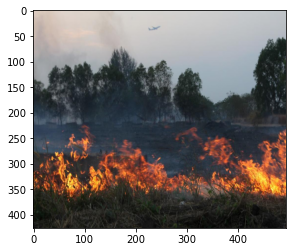

In [71]:
im = cv2.imread('../datasets/sampletest/vegefire.jpg')
im_resized = cv2.resize(im, (495, 426), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [47]:
sampletest=[np.array(Image.open(v).resize((495,426))) for v in sampletest]

In [50]:
sampletest=np.array(sampletest)

In [53]:
predictions=model.predict(sampletest)

In [54]:
score = tf.nn.softmax(predictions[0])

In [55]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(['Fire','Traffic'][np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Fire with a 100.00 percent confidence.


In [116]:
total_data.shape

(1006, 426, 495, 3)

In [112]:
len(total_labels)

1006

In [113]:
total_data.shape

AttributeError: 'list' object has no attribute 'shape'

In [40]:
data[0][0][0]

array([60, 70, 61], dtype=uint8)

In [50]:
sum(Image.open(f, 'r').size for f in data_list)/len(data_list)

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

In [43]:
from numpy import array
image_array = array([Image.open(f, 'r').size for f in data_list])
print(image_array.argmax())

42


In [46]:
def get_img_size(path):
    width, height = Image.open(path).size
    return width*height

largest = max(data_list, key=get_img_size)

In [47]:
largest

'../datasets/fire/fire\\fire_image0022.jpg'